# Random Forest


In [1]:
# import libraries

import pandas as pd
import numpy as np
import os


# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# insert data file: staff_16-17
df=pd.read_excel('D:/My data/Aru/Project/staff utlz latest 16-17_masked_RF.xlsx')

In [3]:
df.rename(columns={'Employee Number':'Employee No'},inplace=True)
print(df.head())


   Employee No Employee Position   Supervisor name Current Status  \
0            1           Level 2  Idalina Lauraine         Active   
1            2           Level 2  Idalina Lauraine         Active   
2            3           Level 2  Idalina Lauraine         Active   
3            4           Level 2  Idalina Lauraine         Active   
4            5           Level 1     Abagail Druci         Active   

   Total Hours  Total Available Hours  Work Hours  Leave Hours  \
0         2088                 1802.0       636.0        216.0   
1         2088                 1882.0       555.5        156.0   
2         2088                 1898.5      1004.5        144.0   
3         2088                 1851.0       273.0        208.0   
4         1312                 1205.0       149.0        104.0   

   Training Hours  BD Hours  NC Hours Utilization%  
0            70.0    1192.0      56.0     0.352941  
1            50.0     694.0     734.0     0.295165  
2            45.5     507.0  

In [4]:
print("NO.of Records : ",df.shape[0])

print("NO.of Columns : ",df.shape[1])

print(df.columns)

NO.of Records :  789
NO.of Columns :  12
Index(['Employee No', 'Employee Position', 'Supervisor name', 'Current Status',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            789 non-null    int64  
 1   Employee Position      789 non-null    object 
 2   Supervisor name        789 non-null    object 
 3   Current Status         789 non-null    object 
 4   Total Hours            789 non-null    int64  
 5   Total Available Hours  789 non-null    float64
 6   Work Hours             789 non-null    float64
 7   Leave Hours            789 non-null    float64
 8   Training Hours         789 non-null    float64
 9   BD Hours               789 non-null    float64
 10  NC Hours               789 non-null    float64
 11  Utilization%           789 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 74.1+ KB


In [6]:
df.describe()

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
count,789.000000,789.000000,789.00000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,395.000000,1671.249683,1457.54071,1068.146185,181.152725,32.852826,77.335868,399.150355
std,227.908973,636.789604,575.80742,637.485039,163.632969,33.670871,268.656612,379.930230
min,1.000000,0.000000,0.00000,0.000000,0.000000,-11.000000,-24.000000,-28.500000
25%,198.000000,1480.000000,1216.00000,493.000000,104.000000,5.660000,0.000000,120.000000
50%,395.000000,2088.000000,1762.00000,1176.000000,168.000000,22.500000,0.000000,297.000000
75%,592.000000,2088.000000,1860.00000,1631.000000,227.000000,50.000000,0.000000,563.500000
max,789.000000,2088.000000,2088.00000,2413.000000,1576.000000,169.000000,1876.000000,2458.500000


# Data Preparation 

1. check missing values

In [7]:
df.isnull().sum()
# no null values in data set

Employee No              0
Employee Position        0
Supervisor name          0
Current Status           0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
dtype: int64

In [8]:
#checking the categorical and continuous columns
df.nunique().sort_values()

Current Status             4
Employee Position         12
Leave Hours              116
Supervisor name          118
BD Hours                 120
Total Hours              130
Training Hours           223
NC Hours                 549
Total Available Hours    577
Work Hours               602
Utilization%             740
Employee No              789
dtype: int64

In [9]:
# check data file
print(df.columns)

Index(['Employee No', 'Employee Position', 'Supervisor name', 'Current Status',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')


convert categorical data into number format

In [10]:
# current status
# Active = 0
# Resigned = 1
# Secondment = 0
#New Joiner = 0
#Sabbatical = 0
var_update = 'Current Status'
df[var_update].value_counts()

# Current Status
df[var_update].replace({"Active":0, "Resigned":1, "Secondment":0, "Sabbatical":0, "New Joiner" : 0, 
                             }, inplace = True)

df[var_update].value_counts()


0    648
1    141
Name: Current Status, dtype: int64

In [11]:
var_update = 'Employee Position'
df[var_update].value_counts() # To check the unique categories of the variable


Level 7     270
Level 8     210
Level 6     154
Level 5      80
Level 4      37
Level 3      20
Level 2       9
Level A3      3
Level A2      3
Level 1       1
Level A1      1
Level 10      1
Name: Employee Position, dtype: int64

In [12]:
df[var_update].replace({"Level 1":1, "Level 2":2, "Level 3":3, "Level 4":4,
                             "Level 5":5, "Level 6":6, "Level 7":7, "Level 8":8,"Level 10":10,
                             "Level A1":11, "Level A2":12, "Level A3":13}, inplace = True)
df[var_update].value_counts()

7     270
8     210
6     154
5      80
4      37
3      20
2       9
12      3
13      3
1       1
10      1
11      1
Name: Employee Position, dtype: int64

Hot Encoding

In [13]:
len(df['Supervisor name'].unique())

118

In [14]:
# encoding 'Supervisor name' using count/frequency encoding
sv_name1 = df['Supervisor name'].value_counts().to_dict()
df['Supervisor name'] = df['Supervisor name'].map(sv_name1)


In [15]:
df['Supervisor name'].value_counts()

8     120
7     119
6      96
12     72
14     70
11     55
9      54
10     50
5      45
18     36
3      27
4      20
2      14
1      11
Name: Supervisor name, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            789 non-null    int64  
 1   Employee Position      789 non-null    int64  
 2   Supervisor name        789 non-null    int64  
 3   Current Status         789 non-null    int64  
 4   Total Hours            789 non-null    int64  
 5   Total Available Hours  789 non-null    float64
 6   Work Hours             789 non-null    float64
 7   Leave Hours            789 non-null    float64
 8   Training Hours         789 non-null    float64
 9   BD Hours               789 non-null    float64
 10  NC Hours               789 non-null    float64
 11  Utilization%           789 non-null    object 
dtypes: float64(6), int64(5), object(1)
memory usage: 74.1+ KB


In [17]:
df.describe()
df.head()

,Employee No,Employee Position,Supervisor name,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,2,8,0,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941
1,2,2,8,0,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165
2,3,2,8,0,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102
3,4,2,8,0,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488
4,5,1,1,0,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651


In [18]:
print(df.dtypes)

Employee No                int64
Employee Position          int64
Supervisor name            int64
Current Status             int64
Total Hours                int64
Total Available Hours    float64
Work Hours               float64
Leave Hours              float64
Training Hours           float64
BD Hours                 float64
NC Hours                 float64
Utilization%              object
dtype: object


In [19]:
df['Utilization%'] = pd.to_numeric(df['Utilization%'], errors = 'coerce')

# Check for outliers

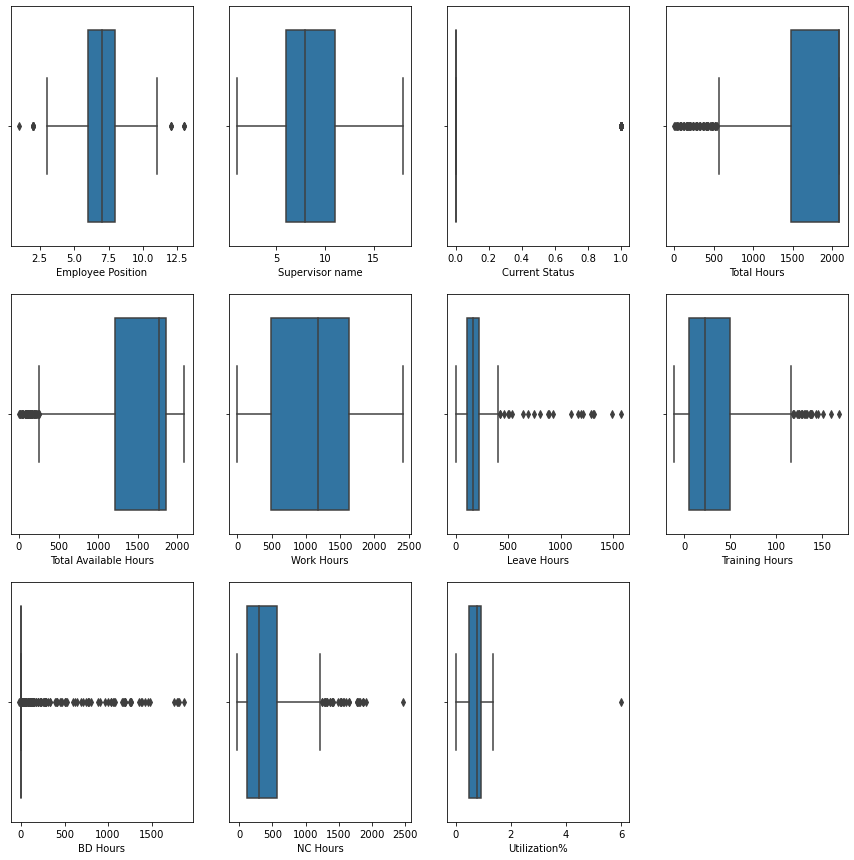

In [20]:
import seaborn as sns

int_cols=list(df.select_dtypes(['int64','float64']).columns)


plt.figure(figsize=(15,15))
for j in range(1,len(int_cols)):
    plt.subplot(3,4,j)
    sns.boxplot(df[int_cols[j]])
       

#### Dummy Variable Creation

In [21]:
df1=pd.get_dummies(df)

In [22]:
df1

,Employee No,Employee Position,Supervisor name,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,2,8,0,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941
1,2,2,8,0,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165
2,3,2,8,0,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102
3,4,2,8,0,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488
4,5,1,1,0,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651
...,...,...,...,...,...,...,...,...,...,...,...,...
784,785,8,18,0,80,32.0,32.0,8.0,40.0,0.0,0.0,1.000000
785,786,8,8,0,80,40.0,0.0,0.0,40.0,0.0,40.0,0.000000
786,787,8,9,0,80,72.0,0.0,0.0,8.0,0.0,72.0,0.000000
787,788,7,11,0,40,32.0,0.0,8.0,0.0,0.0,32.0,0.000000


In [23]:
depVar = "Current Status"
trainX = df1.drop([depVar], axis = 1).copy()
trainY = df1[depVar].copy()


In [24]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            789 non-null    int64  
 1   Employee Position      789 non-null    int64  
 2   Supervisor name        789 non-null    int64  
 3   Total Hours            789 non-null    int64  
 4   Total Available Hours  789 non-null    float64
 5   Work Hours             789 non-null    float64
 6   Leave Hours            789 non-null    float64
 7   Training Hours         789 non-null    float64
 8   BD Hours               789 non-null    float64
 9   NC Hours               789 non-null    float64
 10  Utilization%           788 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 67.9 KB


In [25]:
trainX.shape

(789, 11)

In [26]:
trainX.isnull().sum()

Employee No              0
Employee Position        0
Supervisor name          0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             1
dtype: int64

#### replace new missing values

In [27]:
temp = trainX["Utilization%"].median()

trainX["Utilization%"] = trainX["Utilization%"].fillna(temp)

In [28]:
M_rf1 = RandomForestClassifier(random_state = 171994).fit(trainX, trainY)

# import test data set

In [29]:
df_test=pd.read_excel('D:/My data/Aru/Project/staff utlz latest 17-18_masked_RF.xlsx')

In [30]:
df_test.rename(columns={'Employee Number':'Employee No'},inplace=True)
print(df_test.head())


   Employee No Employee Position   Supervisor name Current Status  \
0            1           Level 1  Idalina Lauraine         Active   
1            2           Level 2  Idalina Lauraine         Active   
2            3           Level 2  Idalina Lauraine         Active   
3            4           Level 2  Idalina Lauraine       Resigned   
4            6           Level 2  Idalina Lauraine         Active   

   Total Hours  Total Available Hours  Work Hours  Leave Hours  \
0         2080                 1864.5       448.0          188   
1         2080                 1868.0       722.0          208   
2         2080                 1720.0      1173.0          338   
3         1840                 1640.5       273.0          196   
4         2080                 1812.0       428.0          260   

   Training Hours  BD Hours  NC Hours Utilization%  
0            27.5    1431.5      18.0     0.240279  
1             4.0     600.5     596.5      0.38651  
2            22.0     463.5  

In [31]:
print("NO.of Records : ",df_test.shape[0])

print("NO.of Columns : ",df_test.shape[1])

print(df_test.columns)

NO.of Records :  948
NO.of Columns :  12
Index(['Employee No', 'Employee Position', 'Supervisor name', 'Current Status',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            948 non-null    int64  
 1   Employee Position      948 non-null    object 
 2   Supervisor name        948 non-null    object 
 3   Current Status         948 non-null    object 
 4   Total Hours            948 non-null    int64  
 5   Total Available Hours  948 non-null    float64
 6   Work Hours             948 non-null    float64
 7   Leave Hours            948 non-null    int64  
 8   Training Hours         948 non-null    float64
 9   BD Hours               948 non-null    float64
 10  NC Hours               948 non-null    float64
 11  Utilization%           948 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 89.0+ KB


In [33]:
df_test.describe()

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,585.970464,1653.291139,1437.158302,1113.778027,188.053797,28.933470,63.572785,338.574736
std,321.834212,640.615883,576.584288,641.034457,165.207067,29.214842,257.653479,395.049759
min,1.000000,24.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,-8.000000
25%,312.250000,1406.000000,1195.750000,584.000000,99.000000,8.000000,0.000000,63.875000
50%,608.500000,2080.000000,1742.750000,1264.500000,176.000000,23.000000,0.000000,207.500000
75%,862.250000,2080.000000,1840.000000,1660.500000,248.000000,40.000000,0.000000,456.000000
max,1111.000000,2080.000000,2080.000000,2669.000000,2080.000000,150.000000,2015.000000,2257.000000


In [34]:
# Data Preparation 

#1. chech missing values

df_test.isnull().sum()
# no null values in data set


Employee No              0
Employee Position        0
Supervisor name          0
Current Status           0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
dtype: int64

In [35]:
df_test.nunique().sort_values()

Current Status             5
Employee Position         11
Total Hours               97
BD Hours                 101
Leave Hours              133
Supervisor name          137
Training Hours           226
NC Hours                 528
Total Available Hours    656
Work Hours               690
Utilization%             858
Employee No              948
dtype: int64

In [36]:
df.nunique().sort_values()

Current Status             2
Employee Position         12
Supervisor name           14
Leave Hours              116
BD Hours                 120
Total Hours              130
Training Hours           223
NC Hours                 549
Total Available Hours    577
Work Hours               602
Utilization%             739
Employee No              789
dtype: int64

In [37]:
df_test.nunique().sort_values()

Current Status             5
Employee Position         11
Total Hours               97
BD Hours                 101
Leave Hours              133
Supervisor name          137
Training Hours           226
NC Hours                 528
Total Available Hours    656
Work Hours               690
Utilization%             858
Employee No              948
dtype: int64

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            948 non-null    int64  
 1   Employee Position      948 non-null    object 
 2   Supervisor name        948 non-null    object 
 3   Current Status         948 non-null    object 
 4   Total Hours            948 non-null    int64  
 5   Total Available Hours  948 non-null    float64
 6   Work Hours             948 non-null    float64
 7   Leave Hours            948 non-null    int64  
 8   Training Hours         948 non-null    float64
 9   BD Hours               948 non-null    float64
 10  NC Hours               948 non-null    float64
 11  Utilization%           948 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 89.0+ KB


In [39]:
# current status
# Active = 0
# Resigned = 1
# Secondment = 0
#New Joiner = 0
#Sabbatical = 0
var_update = 'Current Status'
df[var_update].value_counts()

# Current Status
df_test[var_update].replace({"Active":0, "Resigned":1, "Secondment":0, "Sabbatical":0, "New Joiner" : 0, 
                             }, inplace = True)

df_test[var_update].value_counts()

0    821
1    127
Name: Current Status, dtype: int64

In [40]:
#one more - is extra here4
var_update = 'Employee Position'
df_test[var_update].value_counts() # To check the unique categories of the variable


df_test[var_update].replace({"Level 1":1, "Level 2":2, "Level 3":3, "Level 4":4,
                             "Level 5":5, "Level 6":6, "Level 7":7, "Level 8":8,"Level 10":10,
                             "Level A1":11, "Level A2":12, "Level A3":13, "-":14}, inplace = True)
df_test[var_update].value_counts()

7     318
8     262
6     197
5      89
4      42
3      20
2      11
12      3
13      3
11      2
1       1
Name: Employee Position, dtype: int64

In [41]:
len(df_test['Supervisor name'].unique())


137

hot encoding

In [42]:

# encoding 'Supervisor name' using count/frequency encoding
sv_name1 = df_test['Supervisor name'].value_counts().to_dict()
df_test['Supervisor name'] = df_test['Supervisor name'].map(sv_name1)


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            948 non-null    int64  
 1   Employee Position      948 non-null    int64  
 2   Supervisor name        948 non-null    int64  
 3   Current Status         948 non-null    int64  
 4   Total Hours            948 non-null    int64  
 5   Total Available Hours  948 non-null    float64
 6   Work Hours             948 non-null    float64
 7   Leave Hours            948 non-null    int64  
 8   Training Hours         948 non-null    float64
 9   BD Hours               948 non-null    float64
 10  NC Hours               948 non-null    float64
 11  Utilization%           948 non-null    object 
dtypes: float64(5), int64(6), object(1)
memory usage: 89.0+ KB


In [44]:
#check unique values
var_update = 'Supervisor name'
df[var_update].value_counts()


8     120
7     119
6      96
12     72
14     70
11     55
9      54
10     50
5      45
18     36
3      27
4      20
2      14
1      11
Name: Supervisor name, dtype: int64

In [45]:
df_test['Utilization%'] = pd.to_numeric(df_test['Utilization%'], errors = 'coerce')

In [46]:
#### Dummy Variable Creation

df_test1=pd.get_dummies(df_test)

In [47]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            948 non-null    int64  
 1   Employee Position      948 non-null    int64  
 2   Supervisor name        948 non-null    int64  
 3   Current Status         948 non-null    int64  
 4   Total Hours            948 non-null    int64  
 5   Total Available Hours  948 non-null    float64
 6   Work Hours             948 non-null    float64
 7   Leave Hours            948 non-null    int64  
 8   Training Hours         948 non-null    float64
 9   BD Hours               948 non-null    float64
 10  NC Hours               948 non-null    float64
 11  Utilization%           943 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 89.0 KB


In [48]:
depVar = "Current Status"
testX = df_test1.drop([depVar], axis = 1).copy()
testY = df_test1[depVar].copy()


In [49]:
testX

,Employee No,Employee Position,Supervisor name,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,1,8,2080,1864.5,448.0,188,27.5,1431.5,18.0,0.240279
1,2,2,8,2080,1868.0,722.0,208,4.0,600.5,596.5,0.386510
2,3,2,8,2080,1720.0,1173.0,338,22.0,463.5,357.5,0.681977
3,4,2,8,1840,1640.5,273.0,196,3.5,1361.0,24.0,0.166413
4,6,2,8,2080,1812.0,428.0,260,8.0,1237.0,470.0,0.236203
...,...,...,...,...,...,...,...,...,...,...,...
943,1103,8,6,80,-40.0,0.0,0,120.0,0.0,0.0,0.000000
944,1111,7,7,40,24.0,0.0,8,8.0,0.0,24.0,0.000000
945,1104,8,3,40,9.0,0.0,8,23.0,0.0,9.0,0.000000
946,1105,7,14,40,0.0,0.0,8,32.0,0.0,0.0,NaN


In [50]:
testX.isnull().sum()

Employee No              0
Employee Position        0
Supervisor name          0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             5
dtype: int64

#### replace missing values

In [51]:
temp1 = testX["Utilization%"].median()

testX["Utilization%"] = testX["Utilization%"].fillna(temp1)

In [52]:
testY

0      0
1      0
2      0
3      1
4      0
      ..
943    0
944    0
945    0
946    0
947    0
Name: Current Status, Length: 948, dtype: int64

#### Prediction

In [53]:
test_pred = M_rf1.predict(testX)

#### Confusion Matrix

In [54]:
Confu_mat = pd.crosstab(testY, test_pred)

In [55]:
Confu_mat

col_0,0,1
Current Status,,
0,815,6
1,48,79


In [56]:
from sklearn.metrics import classification_report

print(classification_report(testY, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       821
           1       0.93      0.62      0.75       127

    accuracy                           0.94       948
   macro avg       0.94      0.81      0.86       948
weighted avg       0.94      0.94      0.94       948



In [57]:
M_rf1.feature_importances_ 

array([0.23647148, 0.01965666, 0.02776613, 0.20591723, 0.14664798,
       0.05704508, 0.08288348, 0.14219771, 0.00949966, 0.03846242,
       0.03345217])

#### RF Model with Tuning Parameters

In [58]:
M_rf2 = RandomForestClassifier( random_state = 1994, n_estimators = 25,
                                max_features = 3, min_samples_leaf = 500)

In [59]:
M_rf2 = M_rf2.fit(trainX, trainY)

In [60]:
Test_Pred2 = M_rf2.predict(testX)

#### Confusion Matrix

In [61]:
Confu_mat2 = pd.crosstab(testY, Test_Pred2); Confu_mat2

col_0,0
Current Status,
0,821
1,127


roc_auc_score

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

clf_rf = RandomForestClassifier(max_depth=12,random_state=0)
clf_rf.fit(trainX,trainY)

hr_predict_rf = clf_rf.predict(testX)
hr_predict_rf_df=pd.DataFrame({'Test Data':testY,'Prediction':hr_predict_rf}) #.reset_index()
# hr_predict_rf_df.rename(columns={'index':'Employee No'},inplace=True)

cm_rf=confusion_matrix(testY, hr_predict_rf)
print(cm_rf)

print({'tn':cm_rf[0,0],'fp':cm_rf[0,1],'fn':cm_rf[1,0],'tp':cm_rf[1,1]})

#hr_predict_rf_df.loc[~(hr_predict_rf_df['Test Data']==hr_predict_rf_df['Prediction'])]

print(classification_report(testY,hr_predict_rf))


[[815   6]
 [ 49  78]]
{'tn': 815, 'fp': 6, 'fn': 49, 'tp': 78}
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       821
           1       0.93      0.61      0.74       127

    accuracy                           0.94       948
   macro avg       0.94      0.80      0.85       948
weighted avg       0.94      0.94      0.94       948



Random Forests ROC AUC = 0.889


Text(0, 0.5, 'True Positive Rate')

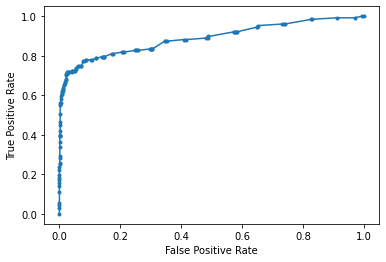

In [68]:
# ROC-AUC curve analysis
clf_rf_probs = clf_rf.predict_proba(testX)[:,1]

#hr_predict_df['Test'].replace({'Active':0,'Resigned':1},inplace=True)
#hr_predict_df['Prediction'].replace({'Active':0,'Resigned':1},inplace=True)

print('Random Forests ROC AUC = %.3f' % roc_auc_score(hr_predict_rf_df['Test Data'], clf_rf_probs))

fpr, tpr, thresholds = roc_curve(hr_predict_rf_df['Test Data'], clf_rf_probs)

plt.plot(fpr,tpr,marker='.',label='Random Forests')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
